## Q1 Solution ##
Here the files "C:\Users\Sai\Desktop\Raw data\32_Murder_victim_age_sex.csv","C:\Users\Sai\Desktop\Raw data\33_CH_not_murder_victim_age_sex.csv","C:\Users\Sai\Desktop\Raw data\20_Victims_of_rape.csv" are used.
The files "C:\Users\Sai\Desktop\Raw data\32_Murder_victim_age_sex.csv","C:\Users\Sai\Desktop\Raw data\33_CH_not_murder_victim_age_sex.csv",are merged using ecxel and new file named "C:\Users\Sai\Desktop\Q1victim1\merged victim data.xlsx" is made.

Importing pandas library .

In [1]:
import pandas as pd

Loading the victims of rape dataset. reading the info of datset. Removing the rows having the subgroup reading as Total rape victims. This step is done because the it is total of the readings present in the dataset.
Getting the clean data. Reading info of clean data.

In [ ]:
file_path_r=r"C:\Users\Sai\Desktop\Q1victim1\20_Victims_of_rape.csv"
df_r=pd.read_csv(file_path_r)
df_r.info()
df_r_cleaned=df_r[df_r['Subgroup'].str.contains("Total Rape Victims",na=False)]
df_r_cleaned.head()
df_r_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 1047
Data columns (total 11 columns):
 #   Column               

Importing the libraries. Loading the dataset.Loading the merged victims dataset.Columns are renamed to ensure there is no confusion. Converting the victims of rape column into numeric and handling non numeric data. Sum of total victims per year.Merging both datasets on column year. Computes ta\otal victims for both datasets.
PLotting the total number of victims per year.
X-axis: Year
Y Axis:Toatl victims
Red line:Represents trends.

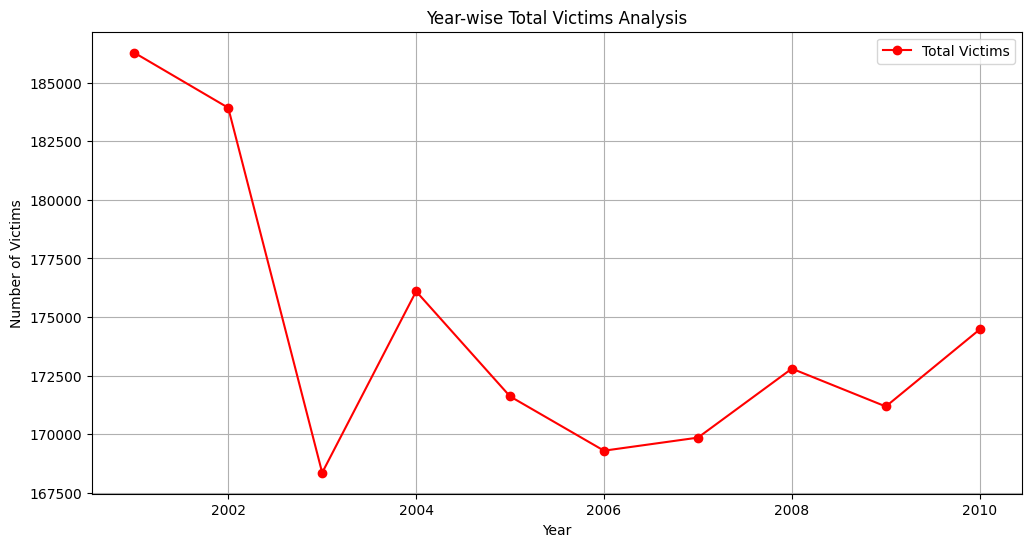

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "Victims of Rape": r"C:\Users\Sai\Desktop\Q1victim1\20_Victims_of_rape_cleaned.csv",
    "Merged Victim Data": r"C:\Users\Sai\Desktop\Q1victim1\merged victim data.xlsx"
}

df_rape = pd.read_csv(file_paths["Victims of Rape"])
df_merged_victims = pd.read_excel(file_paths["Merged Victim Data"])


df_rape.rename(columns={"Year": "Year", "Victims": "Victims_of_Rape_Total"}, inplace=True)
df_merged_victims.rename(columns={"Year": "Year"}, inplace=True)


df_rape["Victims_of_Rape_Total"] = pd.to_numeric(df_rape["Victims_of_Rape_Total"], errors='coerce')
df_merged_victims.iloc[:, 1:] = df_merged_victims.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


victims_per_year_rape = df_rape.groupby("Year")["Victims_of_Rape_Total"].sum().reset_index()
victims_per_year_merged = df_merged_victims.groupby("Year").sum().reset_index()


victims_per_year = victims_per_year_rape.merge(victims_per_year_merged, on="Year", how="left")
victims_per_year["Total_Victims"] = victims_per_year["Victims_of_Rape_Total"].fillna(0) + victims_per_year.iloc[:, 2:].sum(axis=1, numeric_only=True)


plt.figure(figsize=(12, 6))
plt.plot(victims_per_year["Year"], victims_per_year["Total_Victims"], marker='o', linestyle='-', color='red', label="Total Victims")

plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.title("Year-wise Total Victims Analysis")
plt.legend()
plt.grid(True)
plt.show()
